# Objective and Background

Time Series Analysis (and Prediction) of power usage

* The data used has been downloaded from: https://www.kaggle.com/srinuti/residential-power-usage-3years-data-timeseries
* The data set contains hourly power usage of 2storied house located in Houston, Texas, USA. The data set contains hourly power usage in kwh starting from 01-06-2016 to August 2020. The dataset has marked notes for weekdays, weekends, COVID lockdown & vacation days in notes category column.
* Power usage during day time is different from night time. The electrical devices that are inside the house are security DVR and POI cameras, 2 x refrigerators, 2 x 50gallon water heater that are on during day time. At night several electrical bulbs, TV's, washing machine, dryer and AC run from evening 6pm to morning 8am.
* Another data contains historical weather report of Houston, Texas starting from 01-06-2016 to August 2020. Thanks to wonderful weather at Houston, Texas we are blessed with almost 9 months of summer. Starting from Feb month to Nov month and winter is only for two months December and January for most of the years.

* Information about the Power Usage Dataset:
    * Power Usage 2016 to 2020 data file
        * Notes column:-
        * Vacation setting:- '"AC and electric bulbs turned off"
        * COVID- Lockdown:- 'AC is turned on during day time, laptops, monitors etc., are on"
        * Weekday:- 'Morning 7am to 5pm "AC is 84 F temperature during summer and heating set at 60 F during winter".
        * Weekends:- 'Room Temperature is set at 78 F during summer and 68 F for heating during winter"

* Information about the weather dataset:
    * Weather 2016 to 2020 daily 
    * Units
        * Temperature in F deg
        * Dew Point in F deg
        * Humidity in %age
        * Wind in mph
        * Pressure in Hg
        * Precipitation in inch

# Setup

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Read the Data

In [41]:
# filepaths
power_usage_file = 'data/power_usage_2016_to_2020.csv'
weather_file = 'data/weather_2016_2020_daily.csv'

In [106]:
# read data and convert date in date format
df_pow_use = pd.read_csv(power_usage_file, parse_dates={'date':['StartDate']},
                        infer_datetime_format=True,
                        index_col='date')
df_weather = pd.read_csv(weather_file, parse_dates={'date':['Date']},
                        infer_datetime_format=True,
                        index_col='date')

In [107]:
# have a look at the data
df_pow_use.head()

,Value (kWh),day_of_week,notes
date,,,
2016-01-06 00:00:00,1.057,2,weekday
2016-01-06 01:00:00,1.171,2,weekday
2016-01-06 02:00:00,0.560,2,weekday
2016-01-06 03:00:00,0.828,2,weekday
2016-01-06 04:00:00,0.932,2,weekday


In [108]:
df_weather.head()

,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
date,,,,,,,,,,,,,,,,,,
2016-01-06,1,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00,2
2016-02-06,2,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,5
2016-03-06,3,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7,3.18,6
2016-04-06,4,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7,2.37,2
2016-05-06,5,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7,0.39,4


In [109]:
df_pow_use.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35952 entries, 2016-01-06 00:00:00 to 2020-07-07 23:00:00
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Value (kWh)  35952 non-null  float64
 1   day_of_week  35952 non-null  int64  
 2   notes        35952 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


In [110]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1552 entries, 2016-01-06 to 2020-08-30
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day          1552 non-null   int64  
 1   Temp_max     1552 non-null   int64  
 2   Temp_avg     1552 non-null   float64
 3   Temp_min     1552 non-null   int64  
 4   Dew_max      1552 non-null   int64  
 5   Dew_avg      1552 non-null   float64
 6   Dew_min      1552 non-null   int64  
 7   Hum_max      1552 non-null   int64  
 8   Hum_avg      1552 non-null   float64
 9   Hum_min      1552 non-null   int64  
 10  Wind_max     1552 non-null   int64  
 11  Wind_avg     1552 non-null   float64
 12  Wind_min     1552 non-null   int64  
 13  Press_max    1552 non-null   float64
 14  Press_avg    1552 non-null   float64
 15  Press_min    1552 non-null   float64
 16  Precipit     1552 non-null   float64
 17  day_of_week  1552 non-null   int64  
dtypes: float64(8), int64(10)
memor

**Notes**

* Data seems to be all in int or float, except "day of the week"
* There do not seem to be missing values
* Power usage data is given in houly data, has to be converted in dayly means

**Objective**

* Predict power usage of a **day** ("Value (kWh)")
* Ignore the notes and the day/night cycle, just try to predict dayly means with ignoring the aditional information.
* The purpose of this exercise is not to make the best predictions, but to get more familiar with PyTorch Lightning workflow and LSTMs.

In [111]:
# Convert power usage in dayly means
df_pow_use_day = df_pow_use.resample('d').mean()

In [112]:
df_pow_use_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1797 entries, 2016-01-06 to 2020-12-06
Freq: D
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Value (kWh)  1498 non-null   float64
 1   day_of_week  1498 non-null   float64
dtypes: float64(2)
memory usage: 42.1 KB


**Observations**
* The number of dayly means are not the same as in the weather dataframe. 
* The coloumn 'notes' disappears, but is not needed as the same information is in 'day_of_week'.
* After taking the mean, some missing values appear.

In [113]:
columns = ['Value (kWh)','day_of_week']
for col in columns: 
    print(df_pow_use_day[col][df_pow_use_day[col].isnull() == True])

date
2016-01-13   NaN
2016-01-14   NaN
2016-01-15   NaN
2016-01-16   NaN
2016-01-17   NaN
              ..
2020-11-26   NaN
2020-11-27   NaN
2020-11-28   NaN
2020-11-29   NaN
2020-11-30   NaN
Name: Value (kWh), Length: 299, dtype: float64
date
2016-01-13   NaN
2016-01-14   NaN
2016-01-15   NaN
2016-01-16   NaN
2016-01-17   NaN
              ..
2020-11-26   NaN
2020-11-27   NaN
2020-11-28   NaN
2020-11-29   NaN
2020-11-30   NaN
Name: day_of_week, Length: 299, dtype: float64


In [114]:
# have a look at first NaN entry
df_pow_use.loc['2016-01-13 00:00:00':'2016-01-13 23:00:00']


/home/frauke/anaconda3/envs/lightning_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  


,Value (kWh),day_of_week,notes
date,,,


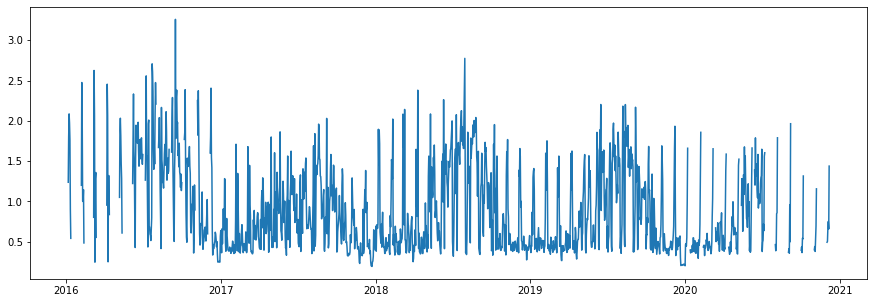

In [115]:
# Plot dayly means
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(df_pow_use_day['Value (kWh)']);

In [136]:
# Impute the means of the other years for the missing values (for sake of simplicity)
years = [2016, 2017, 2018, 2019, 2020]
 
# nan values
for date in (df_pow_use_day['Value (kWh)'][df_pow_use_day['Value (kWh)'].isnull() == True]).index:
    year = date.year
    month = date.month
    day = date.day
    weekday = date.weekday()
    yr_idxs = [yr for yr in years if yr not in [year]]
    if day==29 and month==2 and year==2016:
        idxs_292016 = [datetime.datetime(idx, month, day) for idx in [2020]]
    #elif day==29 and month==2 and year==2020:
    #    idxs_292020 = [datetime.datetime(idx, month, day) for idx in [2016]]
    else:
        idxs_else = [datetime.datetime(idx, month, day) for idx in yr_idxs]
    idxs = idxs_292016 + idxs_else
#calculate and fill means
    df_pow_use_day.loc[date]['Value (kWh)'] = df_pow_use_day.loc[idxs]['Value (kWh)'].mean()
    df_pow_use_day.loc[date]['day_of_week'] = weekday
df_pow_use_day.info()    

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1797 entries, 2016-01-06 to 2020-12-06
Freq: D
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Value (kWh)  1797 non-null   float64
 1   day_of_week  1797 non-null   float64
dtypes: float64(2)
memory usage: 106.7 KB


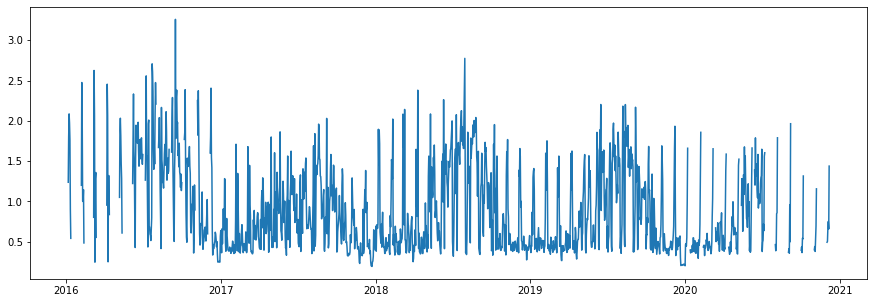

In [137]:
# Plot dayly means
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(df_pow_use_day['Value (kWh)']);

In [157]:
df_weather.sort_index(inplace=True)

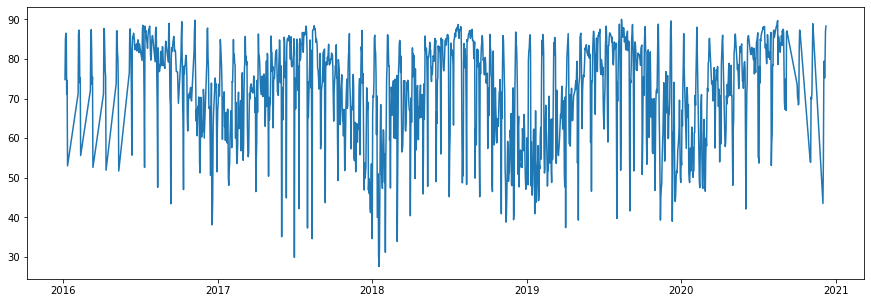

In [159]:
# Plot dayly mean temperature
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(df_weather['Temp_avg']);

In [165]:
# unite both dataframe on index date
df_total = df_pow_use_day.join(df_weather, lsuffix='_pow', rsuffix='_wea')
df_total.head()

,Value (kWh),day_of_week_pow,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week_wea
date,,,,,,,,,,,,,,,,,,,,
2016-01-06,1.237125,2.0,1.0,85.0,74.8,68.0,74.0,71.4,66.0,100.0,89.4,65.0,21.0,9.5,0.0,29.8,29.8,29.7,0.00,2.0
2016-01-07,1.799042,3.0,1.0,94.0,84.9,76.0,76.0,74.0,72.0,94.0,71.6,51.0,13.0,5.7,0.0,29.9,29.9,29.8,0.00,3.0
2016-01-08,2.085708,4.0,1.0,97.0,86.5,75.0,76.0,73.3,67.0,96.0,67.3,37.0,20.0,6.0,0.0,30.0,29.9,29.9,0.00,4.0
2016-01-09,1.973458,5.0,1.0,96.0,86.2,78.0,75.0,73.3,70.0,88.0,67.1,46.0,13.0,6.3,0.0,29.8,29.8,29.7,0.01,5.0
2016-01-10,1.758458,6.0,1.0,81.0,71.1,61.0,64.0,59.4,57.0,90.0,68.7,45.0,8.0,3.3,0.0,30.0,29.9,29.9,0.00,6.0


In [167]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1797 entries, 2016-01-06 to 2020-12-06
Freq: D
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Value (kWh)      1797 non-null   float64
 1   day_of_week_pow  1797 non-null   float64
 2   Day              1550 non-null   float64
 3   Temp_max         1550 non-null   float64
 4   Temp_avg         1550 non-null   float64
 5   Temp_min         1550 non-null   float64
 6   Dew_max          1550 non-null   float64
 7   Dew_avg          1550 non-null   float64
 8   Dew_min          1550 non-null   float64
 9   Hum_max          1550 non-null   float64
 10  Hum_avg          1550 non-null   float64
 11  Hum_min          1550 non-null   float64
 12  Wind_max         1550 non-null   float64
 13  Wind_avg         1550 non-null   float64
 14  Wind_min         1550 non-null   float64
 15  Press_max        1550 non-null   float64
 16  Press_avg        1550 non-null   f

In [168]:
# drop na
df_total.dropna(inplace=True)

In [169]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1550 entries, 2016-01-06 to 2020-12-06
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Value (kWh)      1550 non-null   float64
 1   day_of_week_pow  1550 non-null   float64
 2   Day              1550 non-null   float64
 3   Temp_max         1550 non-null   float64
 4   Temp_avg         1550 non-null   float64
 5   Temp_min         1550 non-null   float64
 6   Dew_max          1550 non-null   float64
 7   Dew_avg          1550 non-null   float64
 8   Dew_min          1550 non-null   float64
 9   Hum_max          1550 non-null   float64
 10  Hum_avg          1550 non-null   float64
 11  Hum_min          1550 non-null   float64
 12  Wind_max         1550 non-null   float64
 13  Wind_avg         1550 non-null   float64
 14  Wind_min         1550 non-null   float64
 15  Press_max        1550 non-null   float64
 16  Press_avg        1550 non-null   float64
 

In [171]:
# safe new dataframe for further usage 
#pd.write_csv('data/df_total.csv')
df_total.to_csv('data/df_total.csv')